In [2]:
import pandas as pd
import numpy as np

In [3]:
mod_cloth = pd.read_json("modcloth_final_data.json",lines=True)

In [8]:
mod_cloth

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,NaN,8,4.0,b,NaN,36.0,outerwear,NaN,5ft 8in,Jennifer,just right,fit,727820,8.5,average,Cute jacket!,Cute jacket!
82786,807722,NaN,12,5.0,ddd/f,NaN,34.0,outerwear,NaN,5ft 5in,Kelli,slightly long,small,197040,NaN,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,NaN,12,5.0,dddd/g,36.0,32.0,outerwear,NaN,5ft 4in,elacount,just right,fit,102493,NaN,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,NaN,12,4.0,NaN,NaN,NaN,outerwear,NaN,5ft 3in,jennaklinner,just right,fit,756491,NaN,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


In [5]:
mod_cloth.shape

(82790, 18)

In [6]:
from pandas_profiling import ProfileReport
prof = ProfileReport(mod_cloth)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
mod_cloth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [9]:
mod_cloth["item_id"].isnull().sum()

0

In [12]:
mod_cloth["waist"].isnull().sum()/mod_cloth.shape[0]*100

96.51890324918469

In [13]:
mod_cloth_d = mod_cloth.drop("waist",axis=1)

In [14]:
mod_cloth_d.shape

(82790, 17)

In [15]:
d = {}
for i in mod_cloth.columns:
    d[i]=mod_cloth[i].isnull().sum()/mod_cloth.shape[0]*100

In [16]:
d

{'item_id': 0.0,
 'waist': 96.51890324918469,
 'size': 0.0,
 'quality': 0.08213552361396304,
 'cup size': 7.555260297137336,
 'hips': 32.281676530982004,
 'bra size': 7.268993839835729,
 'category': 0.0,
 'bust': 85.68184563353061,
 'height': 1.3371180094214277,
 'user_name': 0.0,
 'length': 0.042275637154245684,
 'fit': 0.0,
 'user_id': 0.0,
 'shoe size': 66.28215968112092,
 'shoe width': 77.52506341345573,
 'review_summary': 8.122961710351492,
 'review_text': 8.122961710351492}

In [17]:
l=[]
for i in d:
    if d[i]>50.0:
        l.append(i)

In [18]:
l

['waist', 'bust', 'shoe size', 'shoe width']

In [19]:
mod_cloth_t = mod_cloth.drop(l,axis=1)

In [20]:
mod_cloth_t

,item_id,size,quality,cup size,hips,bra size,category,height,user_name,length,fit,user_id,review_summary,review_text
0,123373,7,5.0,d,38.0,34.0,new,5ft 6in,Emily,just right,small,991571,NaN,NaN
1,123373,13,3.0,b,30.0,36.0,new,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN
2,123373,7,2.0,b,NaN,32.0,new,5ft 7in,Ugggh,slightly long,small,395665,NaN,NaN
3,123373,21,5.0,dd/e,NaN,NaN,new,NaN,alexmeyer626,just right,fit,875643,NaN,NaN
4,123373,18,5.0,b,NaN,36.0,new,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,8,4.0,b,NaN,36.0,outerwear,5ft 8in,Jennifer,just right,fit,727820,Cute jacket!,Cute jacket!
82786,807722,12,5.0,ddd/f,NaN,34.0,outerwear,5ft 5in,Kelli,slightly long,small,197040,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,12,5.0,dddd/g,36.0,32.0,outerwear,5ft 4in,elacount,just right,fit,102493,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,12,4.0,NaN,NaN,NaN,outerwear,5ft 3in,jennaklinner,just right,fit,756491,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


In [21]:
mod_cloth_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   size            82790 non-null  int64  
 2   quality         82722 non-null  float64
 3   cup size        76535 non-null  object 
 4   hips            56064 non-null  float64
 5   bra size        76772 non-null  float64
 6   category        82790 non-null  object 
 7   height          81683 non-null  object 
 8   user_name       82790 non-null  object 
 9   length          82755 non-null  object 
 10  fit             82790 non-null  object 
 11  user_id         82790 non-null  int64  
 12  review_summary  76065 non-null  object 
 13  review_text     76065 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 8.8+ MB


In [23]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1941f1d1190>,
 'caps': [<matplotlib.lines.Line2D at 0x1941f1d1730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1941f1e0e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1941f1d1cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1941f1d1fa0>],
 'means': []}

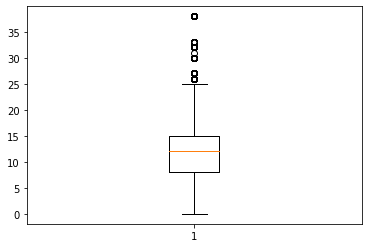

In [28]:
plt.boxplot(mod_cloth_t["size"])

In [30]:
mod_cloth_t["quality"].describe()

count    82722.000000
mean         3.949058
std          0.992783
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: quality, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1941d305a00>,
 'caps': [<matplotlib.lines.Line2D at 0x1941d305fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1941d305730>],
 'medians': [<matplotlib.lines.Line2D at 0x1941d2e4580>],
 'fliers': [<matplotlib.lines.Line2D at 0x1941d2e4850>],
 'means': []}

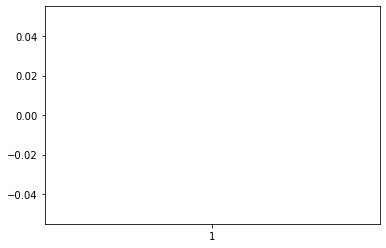

In [31]:
plt.boxplot(mod_cloth_t["quality"])

In [34]:
mod_cloth_t['quality'] = mod_cloth_t['quality'].fillna(mod_cloth_t['quality'].mean())

In [35]:
mod_cloth_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   size            82790 non-null  int64  
 2   quality         82790 non-null  float64
 3   cup size        76535 non-null  object 
 4   hips            56064 non-null  float64
 5   bra size        76772 non-null  float64
 6   category        82790 non-null  object 
 7   height          81683 non-null  object 
 8   user_name       82790 non-null  object 
 9   length          82755 non-null  object 
 10  fit             82790 non-null  object 
 11  user_id         82790 non-null  int64  
 12  review_summary  76065 non-null  object 
 13  review_text     76065 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 8.8+ MB


In [36]:
mod_cloth_t['cup size'].value_counts()

c         18370
d         16149
b         14628
dd/e      12557
ddd/f      6117
a          4791
dddd/g     2008
h          1042
aa          296
j           200
i           189
k           188
Name: cup size, dtype: int64

In [37]:
mod_cloth_t['cup size'].isnull().sum()

6255

In [38]:
mod_cloth_t['cup size'] = mod_cloth_t['cup size'].fillna(mod_cloth_t['cup size'].mode())

In [39]:
mod_cloth_t['bra size'].describe()

count    76772.000000
mean        35.972125
std          3.224907
min         28.000000
25%         34.000000
50%         36.000000
75%         38.000000
max         48.000000
Name: bra size, dtype: float64

In [40]:
mod_cloth_t['bra size'] = mod_cloth_t['bra size'].fillna(mod_cloth_t['bra size'].mode())

In [41]:
mod_cloth_t['bra size'].describe()

count    76772.000000
mean        35.972125
std          3.224907
min         28.000000
25%         34.000000
50%         36.000000
75%         38.000000
max         48.000000
Name: bra size, dtype: float64

In [42]:
mod_cloth_t['hips'].describe()

count    56064.000000
mean        40.358501
std          5.827166
min         30.000000
25%         36.000000
50%         39.000000
75%         43.000000
max         60.000000
Name: hips, dtype: float64

In [43]:
mod_cloth_t['hips'] = mod_cloth_t['hips'].fillna(mod_cloth_t['hips'].mean())

In [44]:
mod_cloth_t['height'].value_counts()

5ft 4in     11928
5ft 6in     11891
5ft 5in      9418
5ft 7in      9161
5ft 3in      8680
5ft 2in      7684
5ft 8in      6420
5ft 9in      4574
5ft 1in      3571
5ft 10in     2715
5ft          2252
5ft 11in     1395
4ft 11in      731
6ft           630
4ft 10in      242
6ft 1in       144
6ft 2in        78
4ft 9in        48
7ft 11in       23
3ft            16
6ft 3in        12
4ft 8in        11
6ft 5in        10
6ft 6in         8
6ft 4in         7
4ft 5in         5
4ft 7in         5
3ft 4in         3
4ft 2in         3
3ft 3in         2
7ft 7in         2
6ft 8in         2
7ft 6in         2
3ft 6in         2
4ft 4in         2
7ft 5in         1
7ft 3in         1
3ft 11in        1
6ft 7in         1
3ft 2in         1
4ft 6in         1
Name: height, dtype: int64

In [45]:
mod_cloth_t['height'] = mod_cloth_t['height'].fillna(mod_cloth_t['height'].mode())